# 패키지 셋팅 및 데이터 호출

- 패키지 호출

1. 목표를 설정합니다.
2. 데이터를 구한다.
3. 데이터를 파악하기 위해 탐색 및 시각화합니다.
4. 어떠한 방법으로 문제를 해결할지 선택
5. 선택한 방법으로 데이터를 학습
6. 모델을 상세하게 조정
7. 유의미한 결과가 나오면 해당 방법을 통해 솔루션을 제시
8. 적용된 뒤 잘 작동하는지 모니터링 

- https://kaggle.com/datasets/
- https://archive.ics.uci.edu/ml/
- https://aws.amazon.com/ko/datasets
- https://dacon.io/

In [2]:
import os


import pandas as pd
import numpy as np

from datetime import datetime , timedelta
import warnings
import itertools
from itertools import product
from tqdm import tqdm_notebook
from math import sqrt

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 20, 10

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

%matplotlib inline

/home/beomseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [1]:
import warnings
warnings.filterwarnings("ignore")

- 현재 디렉토리 확인 및 폴더디렉토리 내 파일 리스트 확인

- 데이터 호출

In [147]:
df_order = pd.read_excel("./data/Superstore.xls",sheet_name = "Orders",dtype="unicode")

In [8]:
df_order

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9399999999999,3,0,219.58199999999997
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0,6.8713999999999995
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03100000000006
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000000000002,2,0.2,2.516399999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21 00:00:00,2014-01-23 00:00:00,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.102799999999999
9990,9991,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.96,2,0,15.633199999999988
9991,9992,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.393200000000007
9992,9993,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6,4,0,13.32


# 데이터 탐색

- 데이터 rows 확인

In [9]:
df_order.shape

(9994, 21)

- 결측치 확인

In [10]:
df_order.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

- 각 컬럼 데이터타입 확인

In [11]:
df_order.dtypes

Row ID           object
Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales            object
Quantity         object
Discount         object
Profit           object
dtype: object

- 데이터 타입 변경

In [13]:
df_order.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136


In [148]:
df_order["Order Date"] = pd.to_datetime(df_order["Order Date"])
df_order["Ship Date"] = pd.to_datetime(df_order["Ship Date"])
df_order["Discount"] = df_order["Discount"].astype(np.float)
df_order["Sales"] = df_order["Sales"].astype(np.float)
df_order["Quantity"] = df_order["Quantity"].astype(np.float)
df_order["Profit"] = df_order["Profit"].astype(np.float)

In [16]:
df_order.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136


- 이상치 확인

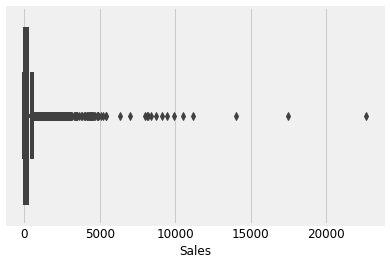

In [17]:
sns.boxplot(x=df_order["Sales"])

In [24]:
df_order["Order ID"].nunique()

5009

- 총 주문량

In [25]:
df_order["Order ID"].nunique()

5009

- 한 주문당 여러 상품이 포함되어있는경우 1개의 중복으로 계산되기 때문에 Order ID기준으로 중복제거

- 가장 많은 상품을 구매한 주문번호 확인

In [27]:
df_order["Order ID"].value_counts()

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2015-131338    10
                  ..
CA-2017-160087    1 
CA-2017-152205    1 
US-2015-157154    1 
CA-2015-111073    1 
CA-2015-136700    1 
Name: Order ID, Length: 5009, dtype: int64

- 가장 많은 상품을 구매한 주문번호의 내역 확인

In [28]:
df_order["Order ID"].value_counts()

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2015-131338    10
                  ..
CA-2017-160087    1 
CA-2017-152205    1 
US-2015-157154    1 
CA-2015-111073    1 
CA-2015-136700    1 
Name: Order ID, Length: 5009, dtype: int64

In [29]:
df_order[df_order["Order ID"]=="CA-2017-100111"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6090,6091,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3.0,0.1,18.1764
6091,6092,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,TEC-AC-10002647,Technology,Accessories,"Logitech Wireless Boombox Speaker - portable - wireless, wired",212.800,2.0,0.0,95.7600
6092,6093,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x 5-1/2, 50 Sheets per Pad",38.520,9.0,0.0,18.1044
6093,6094,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2.0,0.0,21.7920
6094,6095,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x 6-15/16d x 11-1/4h",45.400,4.0,0.0,12.7120
6095,6096,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity, 8 1/16” x 11”",13.760,2.0,0.0,6.3296
6096,6097,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1.0,0.1,8.0991
6097,6098,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x 11"", Light Blue",11.784,3.0,0.2,3.9771
6098,6099,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,4.360,2.0,0.0,1.7876
6099,6100,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs,2888.127,11.0,0.1,609.7157


- 카테고리변수 확인

In [31]:
df_order["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day          543 
Name: Ship Mode, dtype: int64

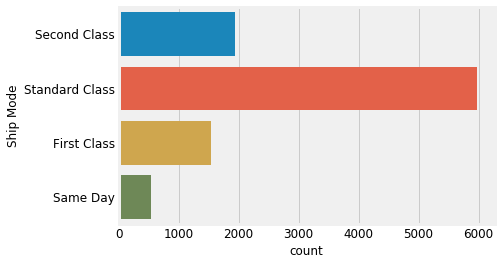

In [32]:
sns.countplot(y="Ship Mode", data=df_order)

- 주문을 많이 한 고객

In [34]:
df_order.drop_duplicates(subset=["Order ID"])["Customer ID"].value_counts()

EP-13915    17
JE-15745    13
NS-18640    13
EA-14035    13
SH-19975    13
            ..
AO-10810    1 
LD-16855    1 
SM-20905    1 
AR-10570    1 
RM-19750    1 
Name: Customer ID, Length: 793, dtype: int64

- 고객 집단 확인

In [38]:
df_order["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

- 배송국 빈도 확인

In [35]:
df_order["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

- 배송지 주(State) 확인

In [37]:
df_order["State"].value_counts()

California              2001
New York                1128
Texas                   985 
Pennsylvania            587 
Washington              506 
Illinois                492 
Ohio                    469 
Florida                 383 
Michigan                255 
North Carolina          249 
Arizona                 224 
Virginia                224 
Georgia                 184 
Tennessee               183 
Colorado                182 
Indiana                 149 
Kentucky                139 
Massachusetts           135 
New Jersey              130 
Oregon                  124 
Wisconsin               110 
Maryland                105 
Delaware                96  
Minnesota               89  
Connecticut             82  
Missouri                66  
Oklahoma                66  
Alabama                 61  
Arkansas                60  
Rhode Island            56  
Mississippi             53  
Utah                    53  
Louisiana               42  
South Carolina          42  
Nevada        

- 배송지 중 California내의 도시 빈도 확인

In [40]:
# df_order[df_order["State"]=="California"]["City"].value_counts()

- 배송지 중 중복을 제거한 도시의 개수

In [41]:
df_order["City"].nunique()

531

In [42]:
df_order.drop_duplicates(subset=["State","City"]).shape

(604, 21)

In [43]:
df_order.drop_duplicates(subset=["State","City"])["City"].value_counts()

Springfield    4
Columbia       4
Jackson        3
Richmond       3
Lakewood       3
              ..
Marysville     1
Olathe         1
Eau Claire     1
Orange         1
Owensboro      1
Name: City, Length: 531, dtype: int64

In [44]:
df_order[df_order["City"]=="Columbia"]["State"].value_counts()

South Carolina    30
Maryland          23
Tennessee         18
Missouri          10
Name: State, dtype: int64

- 가장 판매량이 많은 제품 확인

In [45]:
df_order["Product Name"].value_counts()

Staple envelope                                                                        48
Easy-staple paper                                                                      46
Staples                                                                                46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner    1 
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate              1 
Okidata B401 Printer                                                                   1 
LG G2                                                                                  1 
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled               1 
Name: Prod

# 변수변환

- 품목당 판매가격

In [149]:
df_order["Profit_div_Quantity"] = df_order["Profit"] / df_order["Quantity"]

- 할인율이 젹옹된 판매가

In [55]:
del df_order["Discount_apply_Sale"]

In [150]:
df_order["Discount_apply_Sales"] = df_order["Sales"] - (df_order["Discount"] *df_order["Sales"])

- 총 배송일 계산

In [51]:
df_order.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_div_Quantity,Discount_apply_Sale
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136,20.9568,261.96


In [151]:
df_order["During Date"] = df_order[["Ship Date","Order Date"]].apply(lambda row :(row[0]-row[1]).days,axis=1)

In [152]:
df_order[["Ship Date","Order Date","During Date"]]

,Ship Date,Order Date,During Date
0,2016-11-11,2016-11-08,3
1,2016-11-11,2016-11-08,3
2,2016-06-16,2016-06-12,4
3,2015-10-18,2015-10-11,7
4,2015-10-18,2015-10-11,7
...,...,...,...
9989,2014-01-23,2014-01-21,2
9990,2017-03-03,2017-02-26,5
9991,2017-03-03,2017-02-26,5
9992,2017-03-03,2017-02-26,5


- 택배의 메타데이터 , 품목데이터 분리

In [153]:
ship_df = df_order[["Order ID","Order Date","Ship Mode","Segment","City","State","Postal Code","Country","Region","During Date"]]
product_df = df_order[["Order ID","Product ID","Category","Sub-Category","Product Name","Sales","Quantity","Discount","Profit","Discount_apply_Sales"]]

- 배송물품 메타데이터 중복 제거

In [154]:
unique_ship_df = ship_df.drop_duplicates()

In [155]:
unique_ship_df.shape

(5009, 10)

- 물품 배송지 위경도 호출

In [ ]:
"33311,Florida,Fort Lauderdale,United States"

In [138]:
input_data = "{},{},{},{}".format("33311" ,"Florida" ,"Fort Lauderdale","United States")

In [142]:
input_data

'33311,Florida,Fort Lauderdale,United States'

In [144]:
geolocator = Nominatim(user_agent="test")

In [145]:
location = geolocator.geocode(input_data)

In [146]:
print(location.latitude, location.longitude)

26.143917656263874 -80.17193511869729


In [64]:
from geopy.geocoders import Nominatim
import time
def get_lat_lon(row):
    try:
        postal_code = row["Postal Code"]
        state = row["State"]
        city = row["City"]
        country = row["Country"]
        time.sleep(0.1)
        input_data = "{} , {} , {},{}".format(postal_code,city , state,country)
        geolocator = Nominatim(user_agent="test")
        location = geolocator.geocode(input_data)
        print(location.latitude, location.longitude)
    except AttributeError as e:
        postal_code = row["Postal Code"]
        state = row["State"]
        city = row["City"]
        country = row["Country"]
        time.sleep(0.1)
        input_data = "{} , {} , {}".format(postal_code,city , state)
        geolocator = Nominatim(user_agent="test")
        location = geolocator.geocode(input_data)
        print(location.latitude, location.longitude)
        return pd.Series([location.latitude, location.longitude])

- 유니크한 배송지 위경도 산출

In [112]:
unique_address_df = unique_ship_df.drop_duplicates(subset=["Postal Code","State","City","Country"])[["Postal Code","State","City","Country"]]
unique_address_df[["Ship latitude","Ship longitude"]] = unique_address_df[["Postal Code","State","City","Country"]].apply(lambda row :get_lat_lon(row),axis=1)

37.8367513 -87.5907631
34.0649886 -118.3529825
26.1223084 -80.1433786


KeyboardInterrupt: 

- 배송위치 지도 위 표시

In [156]:
unique_address_df = pd.read_csv("./data/add_lat_lon.csv")

In [157]:
unique_address_df.dtypes

Row ID                  int64  
Order ID                object 
Order Date              object 
Ship Date               object 
Ship Mode               object 
Customer ID             object 
Customer Name           object 
Segment                 object 
Country                 object 
City                    object 
State                   object 
Postal Code             int64  
Region                  object 
Product ID              object 
Category                object 
Sub-Category            object 
Product Name            object 
Sales                   float64
Quantity                int64  
Discount                float64
Profit                  float64
Profit_div_Quantity     float64
Discount_apply_Sales    float64
During Date             int64  
Ship latitude           float64
Ship longitude          float64
dtype: object

In [158]:
unique_ship_df["Postal Code"] = unique_ship_df["Postal Code"].astype(np.int)

In [159]:
unique_ship_df = unique_ship_df.merge(unique_address_df[["Country","City","State","Postal Code","Ship latitude","Ship longitude"]] , how="left", 
                                                     on=["Country","City","State","Postal Code"])

In [160]:
unique_ship_df.shape

(5009, 12)

In [161]:
unique_ship_df.head(1)

,Order ID,Order Date,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude,Ship longitude
0,CA-2016-152156,2016-11-08,Second Class,Consumer,Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763


In [77]:
# unique_ship_df

In [162]:
unique_address_df["Postal Code"] = unique_address_df["Postal Code"].astype(object)

In [79]:
run_m = plt.imread("./data/figure.png")

In [83]:
BBox  = (unique_address_df["Ship longitude"].min() , 
         unique_address_df["Ship longitude"].max(),
         unique_address_df["Ship latitude"].min(),
         unique_address_df["Ship latitude"].max())

- #https://www.openstreetmap.org/export#map=4/38.03/-95.98

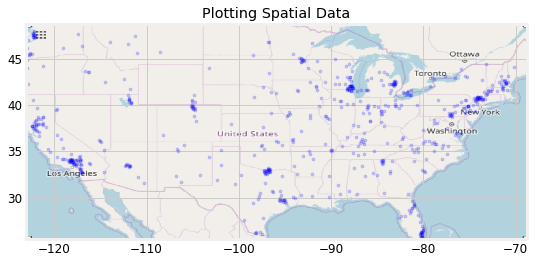

In [84]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(unique_address_df["Ship longitude"], unique_address_df["Ship latitude"], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(run_m, zorder=0, extent = BBox, aspect= 'equal')

In [91]:
df_order.shape

(9994, 24)

In [93]:
df_order.drop_duplicates(subset=["Order ID"]).shape

(5009, 24)

In [89]:
df_order.sort_values(by=["Order Date"],inplace=True)

In [106]:
df_1 = pd.DataFrame({"col1":["a","b","c","d"],"col2":["a","b","c","d"]})

In [107]:
df_1

,col1,col2
0,a,a
1,b,b
2,c,c
3,d,d


In [108]:
df_2 = pd.DataFrame({"col2":["a","b","c"],"col3":["a","b","c"]})

In [111]:
df_2.merge(df_1,how="left",on=["col2"],indicator=True)

,col2,col3,col1,_merge
0,a,a,a,both
1,b,b,b,both
2,c,c,c,both


In [110]:
set_1 = {"a","b","c","d"}
set_2 = {"b","d","c","e"}

In [163]:
unique_ship_df.head(1)

,Order ID,Order Date,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude,Ship longitude
0,CA-2016-152156,2016-11-08,Second Class,Consumer,Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763


In [164]:
unique_ship_df.shape

(5009, 12)

- 배송 내 품복데이터 가공

In [176]:
add_category_df = pd.get_dummies(product_df["Category"],prefix="Category")

In [179]:
add_category_df

,Category_Furniture,Category_Office Supplies,Category_Technology
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
9989,1,0,0
9990,1,0,0
9991,0,0,1
9992,0,1,0


- Category컬럼 더미변수 생성

In [177]:
product_df = pd.concat([product_df.drop(columns=["Category"]) 
                        ,add_category_df],axis=1)

- Sub-Category컬럼 더미변수 생성

In [180]:
add_df = pd.get_dummies(product_df["Sub-Category"], prefix="Sub-Category")

In [181]:
add_df

,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [182]:
product_df = pd.concat([product_df.drop(columns=["Sub-Category"])
                        ,add_df],axis=1)

- 수치형변수 데이터타입 변경

In [183]:
add_numerical_df = product_df.groupby(["Order ID"]).agg({"Product ID":"count",
                                                        "Sales":["sum","mean"],
                                                        "Quantity":"sum",
                                                        "Discount":"sum",
                                                        "Profit":"sum",
                                                        "Discount_apply_Sales":"sum"})

In [184]:
add_numerical_df

Product ID     Sales             Quantity Discount    Profit Discount_apply_Sales
                    count       sum        mean      sum      sum       sum                  sum
Order ID                                                                                        
CA-2014-100006  1          377.970   377.970000  3.0      0.0      109.6113  377.9700           
CA-2014-100090  2          699.192   349.596000  9.0      0.4     -19.0890   559.3536           
CA-2014-100293  1          91.056    91.056000   6.0      0.2      31.8696   72.8448            
CA-2014-100328  1          3.928     3.928000    1.0      0.2      1.3257    3.1424             
CA-2014-100363  2          21.376    10.688000   5.0      0.4      7.7192    17.1008            
...            ..             ...          ...   ...      ...          ...       ...            
US-2017-168802  1          18.368    18.368000   4.0      0.2      5.9696    14.6944            
US-2017-169320  2          171.430   85.715000   7.0      0.0      16.6721   171.4300           
US-2017-169488  2          56.860    28.430000   7.0      0.0      26.5552   56.8600            
US-2017-169502  2          113.410   56.705000   8.0      0.0      32.4527   113.4100           
US-2017-169551  6          1344.838  224.139667  16.0     1.7     -62.2895   912.9098           

[5009 rows x 7 columns]

In [187]:
add_numerical_df.columns = ["{}-{}".format(col[0],col[1]) for col in add_numerical_df.columns.tolist()]

In [189]:
add_numerical_df.head(1)

,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum
Order ID,,,,,,,
CA-2014-100006,1,377.97,377.97,3.0,0.0,109.6113,377.97


- 수치형변수 집약함수 사용

In [192]:
new_df = product_df.drop(columns=["Product ID","Product Name",
                                  "Sales","Quantity","Discount",
                                  "Profit","Discount_apply_Sales"])

In [197]:
new_df = new_df.groupby(["Order ID"]).agg(["sum"])

In [199]:
new_df.columns = ["{}-{}".format(col[0] , col[1]) for col in new_df.columns.tolist()]

In [200]:
new_df.head(1)

,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2014-100006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


- 배송 메타정보 & 물품정보 결합

In [204]:
new_df.reset_index(drop=False,inplace=True)

In [207]:
add_numerical_df.reset_index(drop=False,inplace=True)

In [203]:
unique_ship_df.he

,Order ID,Order Date,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude,Ship longitude
0,CA-2016-152156,2016-11-08,Second Class,Consumer,Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763


In [210]:
result_df = unique_ship_df.merge(add_numerical_df,how="left",on=["Order ID"])

In [212]:
result_df = result_df.merge(new_df,how="left",on=["Order ID"])

- 배송일 기준 Month , Day변수 추가

In [213]:
result_df["Order Month"] = result_df["Order Date"].dt.month
result_df["Order Day"] = result_df["Order Date"].dt.day

In [214]:
result_df[["Order Date","Order Month", "Order Day"]]

,Order Date,Order Month,Order Day
0,2016-11-08,11,8
1,2016-06-12,6,12
2,2015-10-11,10,11
3,2014-06-09,6,9
4,2017-04-15,4,15
...,...,...,...
5004,2016-09-29,9,29
5005,2017-11-17,11,17
5006,2014-01-21,1,21
5007,2017-02-26,2,26


In [216]:
result_df["Postal Code"] = result_df["Postal Code"].astype(object)

In [217]:
save_df = result_df.copy()

In [218]:
result_df.drop(columns=["Order ID"],inplace=True)

In [220]:
result_df.drop(columns=["Order Date"],inplace=True)

In [221]:
result_df["City"] = result_df["State"] + "-" + result_df["City"]

In [223]:
result_df["City"]

604

In [224]:
"aaa"

'aaa'

In [225]:
text_list = []

In [228]:
for i in range(1,11):
    print("col_{}_{}".format(i,i))

col_1_1
col_2_2
col_3_3
col_4_4
col_5_5
col_6_6
col_7_7
col_8_8
col_9_9
col_10_10


In [231]:
df1

,col1,col2
0,1,2
1,2,3
2,3,4


In [232]:
df2

,col1,col2
0,4,6
1,2,3
2,5,5


In [ ]:
new_df.columns = [f"{col[0]}-{col[1]}" for col in new_df.columns.tolist()]


In [236]:
df2[~df2.isin(df1).all(1)]

,col1,col2
0,4,6
2,5,5


In [230]:
df1 = pd.DataFrame({'col1':[1,2,3], 'col2':[2,3,4]})
df2 = pd.DataFrame({'col1':[4,2,5], 'col2':[6,3,5]})


print(df2[df2.isin(df1).all(1)])
print(df2[(df2!=df1)].dropna(how='all'))
print(df2[~(df2==df1)].dropna(how='all'))

   col1  col2
0  4     6   
2  5     5   
   col1  col2
0  4.0   6.0 
2  5.0   5.0 
   col1  col2
0  4.0   6.0 
2  5.0   5.0 


# 모델링

- Train & Test셋 분할

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
result_df.head(1)

,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude,Ship longitude,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Order Month,Order Day
0,Second Class,Consumer,Kentucky-Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763,2,993.9,496.95,5.0,0.0,261.4956,993.9,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,11,8


In [239]:
train_x , test_x , train_y , test_y = train_test_split(\
                                                      result_df.drop(columns=["During Date"]),result_df["During Date"],
                                                      test_size = 0.2, random_state=2020)

In [240]:
result_df.shape

(5009, 39)

In [241]:
train_x.shape

(4007, 38)

In [242]:
test_x.shape

(1002, 38)

- Object 타입변수 위치 설정

In [244]:
train_x.dtypes

Ship Mode                       object 
Segment                         object 
City                            object 
State                           object 
Postal Code                     object 
Country                         object 
Region                          object 
Ship latitude                   float64
Ship longitude                  float64
Product ID-count                int64  
Sales-sum                       float64
Sales-mean                      float64
Quantity-sum                    float64
Discount-sum                    float64
Profit-sum                      float64
Discount_apply_Sales-sum        float64
Category_Furniture-sum          uint8  
Category_Office Supplies-sum    uint8  
Category_Technology-sum         uint8  
Sub-Category_Accessories-sum    uint8  
Sub-Category_Appliances-sum     uint8  
Sub-Category_Art-sum            uint8  
Sub-Category_Binders-sum        uint8  
Sub-Category_Bookcases-sum      uint8  
Sub-Category_Chairs-sum         uint8  


In [245]:
object_col_index= []
for index , col in enumerate(train_x.columns.tolist()):
    if train_x[col].dtype =="object":
        object_col_index.append(index) 

In [246]:
object_col_index

[0, 1, 2, 3, 4, 5, 6]

In [247]:
train_x.head(1)

,Ship Mode,Segment,City,State,Postal Code,Country,Region,Ship latitude,Ship longitude,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Order Month,Order Day
1701,Same Day,Consumer,Texas-Dallas,Texas,75217,United States,Central,32.734588,-96.71307,3,321.39,107.13,10.0,1.1,-72.5666,225.5346,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,10,30


- 모델 생성

In [248]:
from catboost import CatBoostRegressor

In [249]:
model = CatBoostRegressor(iterations=2000 , learning_rate=0.003,
                         depth=4, l2_leaf_reg=3, loss_function="RMSE",eval_metric="RMSE")

- 모델 훈련

In [250]:
model.fit(train_x , train_y, cat_features=object_col_index)

0:	learn: 1.7195473	total: 68.4ms	remaining: 2m 16s
1:	learn: 1.7161810	total: 81.9ms	remaining: 1m 21s
2:	learn: 1.7127735	total: 86.2ms	remaining: 57.4s
3:	learn: 1.7094340	total: 98.9ms	remaining: 49.4s
4:	learn: 1.7061219	total: 103ms	remaining: 41.1s
5:	learn: 1.7027510	total: 107ms	remaining: 35.6s
6:	learn: 1.6994277	total: 122ms	remaining: 34.7s
7:	learn: 1.6961102	total: 133ms	remaining: 33.2s
8:	learn: 1.6930647	total: 145ms	remaining: 32.1s
9:	learn: 1.6899257	total: 155ms	remaining: 30.8s
10:	learn: 1.6867938	total: 169ms	remaining: 30.6s
11:	learn: 1.6834994	total: 174ms	remaining: 28.8s
12:	learn: 1.6802650	total: 187ms	remaining: 28.5s
13:	learn: 1.6770142	total: 193ms	remaining: 27.4s
14:	learn: 1.6737805	total: 204ms	remaining: 27s
15:	learn: 1.6705863	total: 213ms	remaining: 26.4s
16:	learn: 1.6673769	total: 221ms	remaining: 25.7s
17:	learn: 1.6641899	total: 227ms	remaining: 25s
18:	learn: 1.6609835	total: 237ms	remaining: 24.7s
19:	learn: 1.6579681	total: 249ms	remai

- 목표값 예측

In [251]:
train_x.shape

(4007, 38)

In [252]:
test_x.shape

(1002, 38)

In [254]:
y_pred = model.predict(test_x)

In [255]:
test_x.shape

(1002, 38)

In [256]:
y_pred.shape

(1002,)

- 모델 평가

In [257]:
rmse = sqrt(mean_squared_error(y_pred,  test_y))

In [258]:
rmse

0.981476338032434

- 변수 중요도 산출

In [264]:
importance_dict = dict(zip(model.feature_names_, model.feature_importances_))

In [265]:
type(importance_dict)

dict

In [271]:
pd.DataFrame.from_dict(importance_dict,orient="index", columns=["feature_value"]).head(5)

,feature_value
Ship Mode,87.461280
Segment,1.844840
City,0.184957
State,0.247620
Postal Code,0.084154


In [273]:
df_order.drop_duplicates(subset=["Order ID"])["Ship Mode"].value_counts()

Standard Class    2994
Second Class      964 
First Class       787 
Same Day          264 
Name: Ship Mode, dtype: int64

In [259]:
feature_importance_df = pd.DataFrame.from_dict(dict(zip(model.feature_names_,
                                                        model.feature_importances_)),orient="index",columns=["feature_value"])

In [260]:
feature_importance_df

,feature_value
Ship Mode,87.461280
Segment,1.844840
City,0.184957
State,0.247620
Postal Code,0.084154
Country,0.000000
Region,7.932199
Ship latitude,0.184149
Ship longitude,0.135311
Product ID-count,0.076400


- 중요도 산출방법[추가]

[Lime_1](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5)
[Lime_2](https://github.com/marcotcr/lime)

[Shap_1](https://data-newbie.tistory.com/254)
[Shap_2](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)


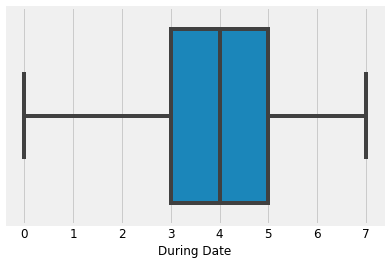

In [274]:
sns.boxplot(x="During Date",data=result_df)

In [275]:
result_df["Ship Mode"].value_counts()

Standard Class    2994
Second Class      964 
First Class       787 
Same Day          264 
Name: Ship Mode, dtype: int64

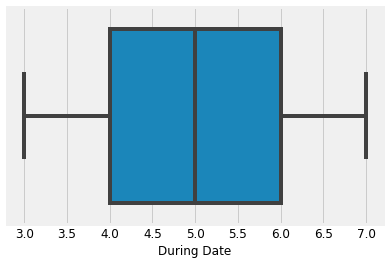

In [276]:
sns.boxplot(x="During Date",data=result_df[result_df["Ship Mode"] =="Standard Class"])

In [283]:
standard_df = result_df[result_df["Ship Mode"]=="Standard Class"]

In [295]:
standard_df["During date_cat"] = 0

In [299]:
standard_df[["During Date","During date_cat"]]

,During Date,During date_cat
2,7,1
3,5,0
4,5,0
5,5,0
6,4,0
...,...,...
5002,6,0
5003,6,0
5004,4,0
5005,4,0


In [297]:
standard_df.loc[standard_df["During Date"]>6,"During date_cat"] = 1

In [301]:
standard_df["During date_cat"].value_counts()

0    2686
1    308 
Name: During date_cat, dtype: int64

In [302]:
del standard_df["During Date_cat"]

In [303]:
del standard_df["During Date"]

In [304]:
from sklearn.preprocessing import LabelEncoder

In [306]:
encoder = LabelEncoder()

In [307]:
standard_df.head(1)

,Ship Mode,Segment,City,State,Postal Code,Country,Region,Ship latitude,Ship longitude,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Order Month,Order Day,During date_cat
2,Standard Class,Consumer,Florida-Fort Lauderdale,Florida,33311,United States,South,26.122308,-80.143379,2,979.9455,489.97275,7.0,0.65,-380.5146,544.562025,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,10,11,1


In [308]:
encoder.fit(standard_df["State"])

LabelEncoder()

In [309]:
standard_df["State_encoded"] = encoder.fit_transform(standard_df["State"])

In [312]:
del standard_df["State_encoded"]

In [314]:
result_df.head(1)

,Ship Mode,Segment,City,State,Postal Code,Country,Region,During Date,Ship latitude,Ship longitude,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Order Month,Order Day
0,Second Class,Consumer,Kentucky-Henderson,Kentucky,42420,United States,South,3,37.836751,-87.590763,2,993.9,496.95,5.0,0.0,261.4956,993.9,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,11,8


In [315]:
standard_df_x = standard_df.drop(columns=["During date_cat"])
standard_df_y = standard_df["During date_cat"]

In [317]:
for col in standard_df_x.columns.tolist():
    if standard_df_x[col].dtype =="object":
        encoder = LabelEncoder()
        encoder.fit(standard_df_x[col])
        standard_df_x[col] = encoder.fit_transform(standard_df_x[col])

In [320]:
x_train , x_test , y_train , y_test = train_test_split(standard_df_x ,
                                                      standard_df_y, 
                                                      test_size=0.2, 
                                                      random_state=2020)

In [321]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [322]:
from sklearn.model_selection import cross_val_score

In [323]:
lr_clf = LogisticRegression()

In [326]:
scores = cross_val_score(lr_clf , x_train , y_train, cv=5)


In [328]:
for iter_count , accuracy in enumerate(scores):
    print("교차 검증 {} 정확도 {}".format(iter_count , accuracy))
print("평균정확도 {}".format(np.mean(scores)))

교차 검증 0 정확도 0.9018789144050104
교차 검증 1 정확도 0.8997912317327766
교차 검증 2 정확도 0.8997912317327766
교차 검증 3 정확도 0.8977035490605428
교차 검증 4 정확도 0.8997912317327766
평균정확도 0.8997912317327768


In [329]:
y_train.value_counts()

0    2156
1    239 
Name: During date_cat, dtype: int64

In [332]:
from imblearn.over_sampling import SMOTENC

In [333]:
X = standard_df.drop(columns=["During date_cat"])
y = standard_df["During date_cat"]

In [334]:
X.head(1)

,Ship Mode,Segment,City,State,Postal Code,Country,Region,Ship latitude,Ship longitude,Product ID-count,Sales-sum,Sales-mean,Quantity-sum,Discount-sum,Profit-sum,Discount_apply_Sales-sum,Category_Furniture-sum,Category_Office Supplies-sum,Category_Technology-sum,Sub-Category_Accessories-sum,Sub-Category_Appliances-sum,Sub-Category_Art-sum,Sub-Category_Binders-sum,Sub-Category_Bookcases-sum,Sub-Category_Chairs-sum,Sub-Category_Copiers-sum,Sub-Category_Envelopes-sum,Sub-Category_Fasteners-sum,Sub-Category_Furnishings-sum,Sub-Category_Labels-sum,Sub-Category_Machines-sum,Sub-Category_Paper-sum,Sub-Category_Phones-sum,Sub-Category_Storage-sum,Sub-Category_Supplies-sum,Sub-Category_Tables-sum,Order Month,Order Day
2,Standard Class,Consumer,Florida-Fort Lauderdale,Florida,33311,United States,South,26.122308,-80.143379,2,979.9455,489.97275,7.0,0.65,-380.5146,544.562025,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,10,11


In [335]:
sm = SMOTENC(random_state=2020 ,categorical_features=[0,1,2,3,4,5,6])

In [337]:
X_res , y_res = sm.fit_resample(X,y)

In [339]:
X_res.shape

(5372, 38)

In [338]:
y_res.value_counts()

1    2686
0    2686
Name: During date_cat, dtype: int64

In [341]:
train_x , test_x , train_y , test_y = train_test_split(X_res, y_res, test_size=0.2,
                                                      random_state=2020)

In [342]:
object_col_index = []
for index , col in enumerate(train_x.columns.tolist()):
    if train_x[col].dtype =="object":
        object_col_index.append(index)

In [343]:
object_col_index

[0, 1, 2, 3, 4, 5, 6]

In [344]:
from catboost import CatBoostClassifier

In [345]:
model = CatBoostClassifier(iterations =2000 , 
                          learning_rate = 0.003,
                          depth = 4,
                          l2_leaf_reg = 3,
                          loss_function ="Logloss")

In [346]:
model.fit(train_x , train_y, cat_features=object_col_index)

0:	learn: 0.6921439	total: 29.7ms	remaining: 59.4s
1:	learn: 0.6911768	total: 37.9ms	remaining: 37.8s
2:	learn: 0.6899825	total: 50ms	remaining: 33.3s
3:	learn: 0.6889757	total: 69.4ms	remaining: 34.6s
4:	learn: 0.6880402	total: 92.5ms	remaining: 36.9s
5:	learn: 0.6870545	total: 109ms	remaining: 36.3s
6:	learn: 0.6862510	total: 128ms	remaining: 36.4s
7:	learn: 0.6854252	total: 141ms	remaining: 35s
8:	learn: 0.6845784	total: 160ms	remaining: 35.5s
9:	learn: 0.6837850	total: 186ms	remaining: 36.9s
10:	learn: 0.6828913	total: 205ms	remaining: 37.1s
11:	learn: 0.6820036	total: 220ms	remaining: 36.4s
12:	learn: 0.6811979	total: 254ms	remaining: 38.8s
13:	learn: 0.6803677	total: 279ms	remaining: 39.5s
14:	learn: 0.6795586	total: 292ms	remaining: 38.7s
15:	learn: 0.6787750	total: 308ms	remaining: 38.2s
16:	learn: 0.6779881	total: 328ms	remaining: 38.3s
17:	learn: 0.6771765	total: 353ms	remaining: 38.9s
18:	learn: 0.6763215	total: 375ms	remaining: 39.1s
19:	learn: 0.6754374	total: 403ms	remain

In [348]:
y_pred = model.predict(test_x)

In [349]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [350]:
print(accuracy_score(test_y , y_pred))

0.9311627906976744


In [351]:
print(confusion_matrix(test_y , y_pred))

[[542  14]
 [ 60 459]]


In [352]:
from sklearn.metrics import roc_curve

In [353]:
y_pred_prob = model.predict_proba(test_x)

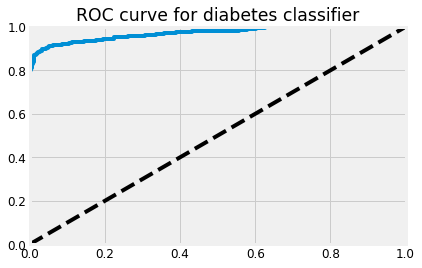

In [357]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [358]:
feature_importance_df = pd.DataFrame.from_dict(dict(zip(model.feature_names_,
                                                        model.feature_importances_)),orient="index",columns=["feature_value"]) 

In [360]:
feature_importance_df.sort_values(by=["feature_value"],ascending=False)

,feature_value
Postal Code,27.439958
City,23.820547
Quantity-sum,7.639852
State,7.222784
Discount-sum,5.172532
Region,5.007677
Ship longitude,4.507457
Ship latitude,2.354130
Category_Technology-sum,1.988811
Category_Office Supplies-sum,1.907735


# 시계열 데이터 복습

## 시계열 데이터 탐색

In [1]:
import pandas as pd

In [2]:
df_order = pd.read_excel("./data/Superstore.xls",sheet_name = "Orders", dtype=  "unicode")

In [5]:
df_order["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [6]:
df_furniture = df_order[df_order["Category"]=="Furniture"]

In [7]:
df_furniture.shape

(2121, 21)

- 주문데이터 기간 확인

In [8]:
df_furniture["Order Date"].min() ,df_furniture["Order Date"].max() 

('2014-01-06 00:00:00', '2017-12-30 00:00:00')

- 사용 컬럼을 제외한 나머지 컬럼 삭제

In [10]:
df_furniture["Order Date"] = pd.to_datetime(df_furniture["Order Date"])

/home/beomseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
cols = ["Order Date","Sales"]

In [12]:
df_furniture = df_furniture[cols]

In [13]:
df_furniture

,Order Date,Sales
0,2016-11-08,261.96
1,2016-11-08,731.9399999999999
3,2015-10-11,957.5775
5,2014-06-09,48.86
10,2014-06-09,1706.1840000000002
...,...,...
9962,2015-03-19,383.46559999999994
9964,2016-12-05,13.4
9980,2015-09-06,85.98
9989,2014-01-21,25.248


- Order Date 기준으로 Sorting

In [14]:
df_furniture.sort_values(by="Order Date", ascending=False,inplace=True)

/home/beomseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- 데이터 타입 변환

In [16]:
import numpy as np

In [20]:
df_furniture["Sales"] = df_furniture["Sales"].astype(np.float)

In [19]:
import warnings
warnings.filterwarnings("ignore")

- 날짜 기준으로 당일 판매 총액 데이터 생성

In [21]:
df_furniture = df_furniture.groupby("Order Date")["Sales"].sum().reset_index(drop=False)

- 시계열 데이터로 다루기 위해 날짜 데이터 인덱스 설정

In [23]:
df_furniture = df_furniture.set_index("Order Date")

In [24]:
df_furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


- resample함수를 이용해 시간단위를 변경

In [30]:
df_furniture.resample("W-MON").mean()["Sales"]

Order Date
2014-01-06    2573.820000
2014-01-13     254.636750
2014-01-20     446.011000
2014-01-27     191.816000
2014-02-03     290.666000
                 ...     
2017-12-04    2419.310571
2017-12-11    1541.691833
2017-12-18     761.995167
2017-12-25    1120.969333
2018-01-01    1068.370267
Freq: W-MON, Name: Sales, Length: 209, dtype: float64

In [25]:
y = df_furniture.resample("MS").mean()["Sales"]

In [26]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015438
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [27]:
import matplotlib.pyplot as plt

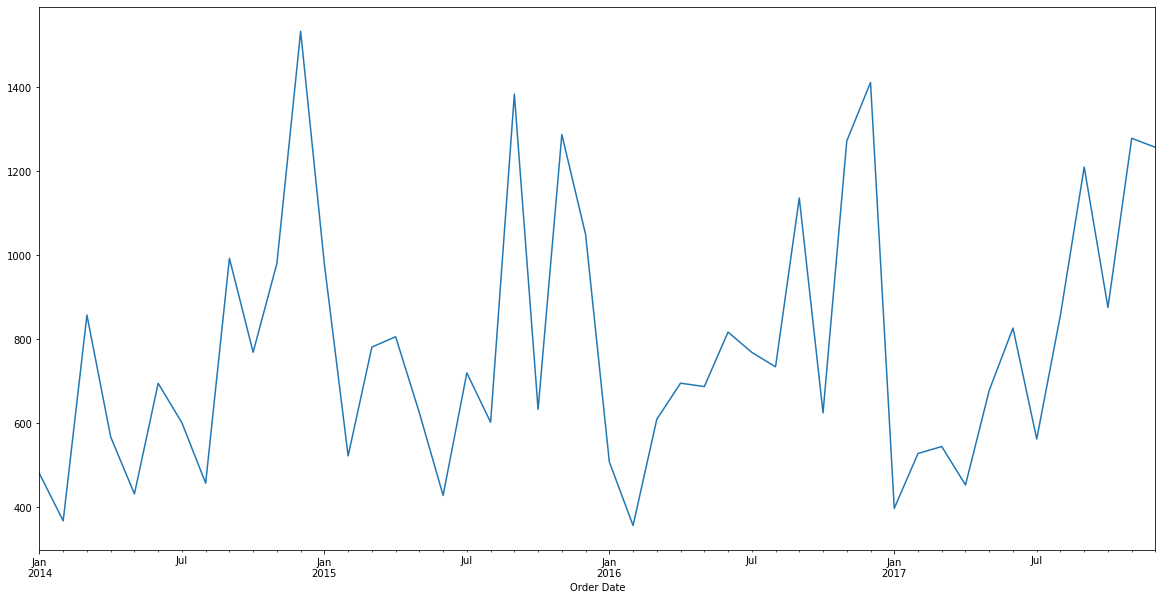

In [28]:
y.plot(figsize=(20,10))
plt.show()

### Cycle(주기)

- 주기를 자기상관(autocorrelation)으로 정의하기도 한다. 자기상관은
각 시점간의 상관 관계를 의미하며 일정 기간 증가하거나 감소하는 경우 양의 자기상관이 존재한다고 하고 시점마다 증감이 반복되는 경우 이를 음의
자기상관이라 한다. 

In [32]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


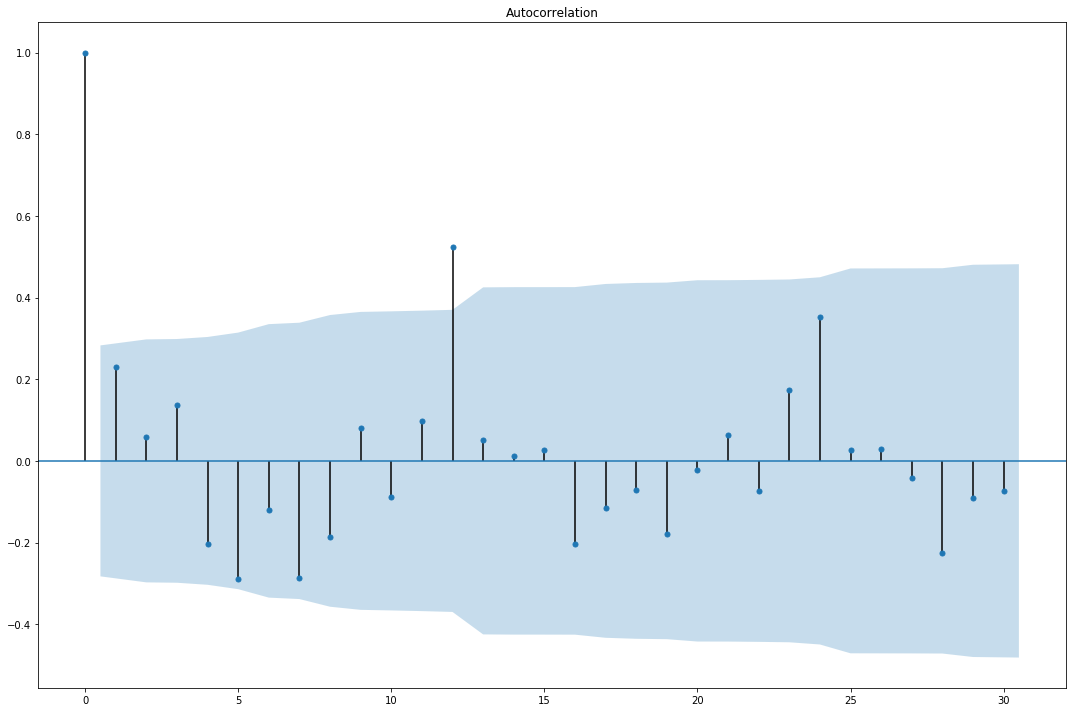

In [33]:
lags=30
fig = plt.figure(figsize=(15,10))
layout = (1,2)
acf_ax = plt.subplot2grid(layout, (0,0),colspan=2)
smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
plt.tight_layout()

### Seasonality(계절성) 
- 계절성은 주기적 변동을 나타냅니다. 
- 일년중 2월과 8월에 원룸 대학가 주변의 원룸계약건수가 높거나 , 대형마트의 물건판매량이 7~9시에 높아진것을 예로들수 있습니다.

### Stationarity
- Stationarity성은 시계열의 중요한 특성입니다. 시계열데이터가 Stationarity하다는 것은 시간이 변해도 평균과 분산은 일정합니다.
- 고전 시계열 모델은 Stationarity조건을 가정하는 경우가 많습니다.

#### Augmented Dickey-Fuller test
- 귀무 가설 (H0) : 시간 t의 변화에 따라 분산이 무한대로 발산
- 대립 가설 (H1) : 시간 t의 변화에 따라 평균 , 분산이 변하지 않음.
- p-value> 0.05 : 귀무 가설 (H0)을 기각 할 수 없습니다. Stationarity하지 않습니다.
- p-value <= 0.05 : 귀무 가설 (H0)을 기각합니다. Stationarity상태입니다.

In [34]:
print("adf 검정통계량 : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[0]))
print("p-value : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[1]))

adf 검정통계량 : -5.19107
p-value : 0.00001


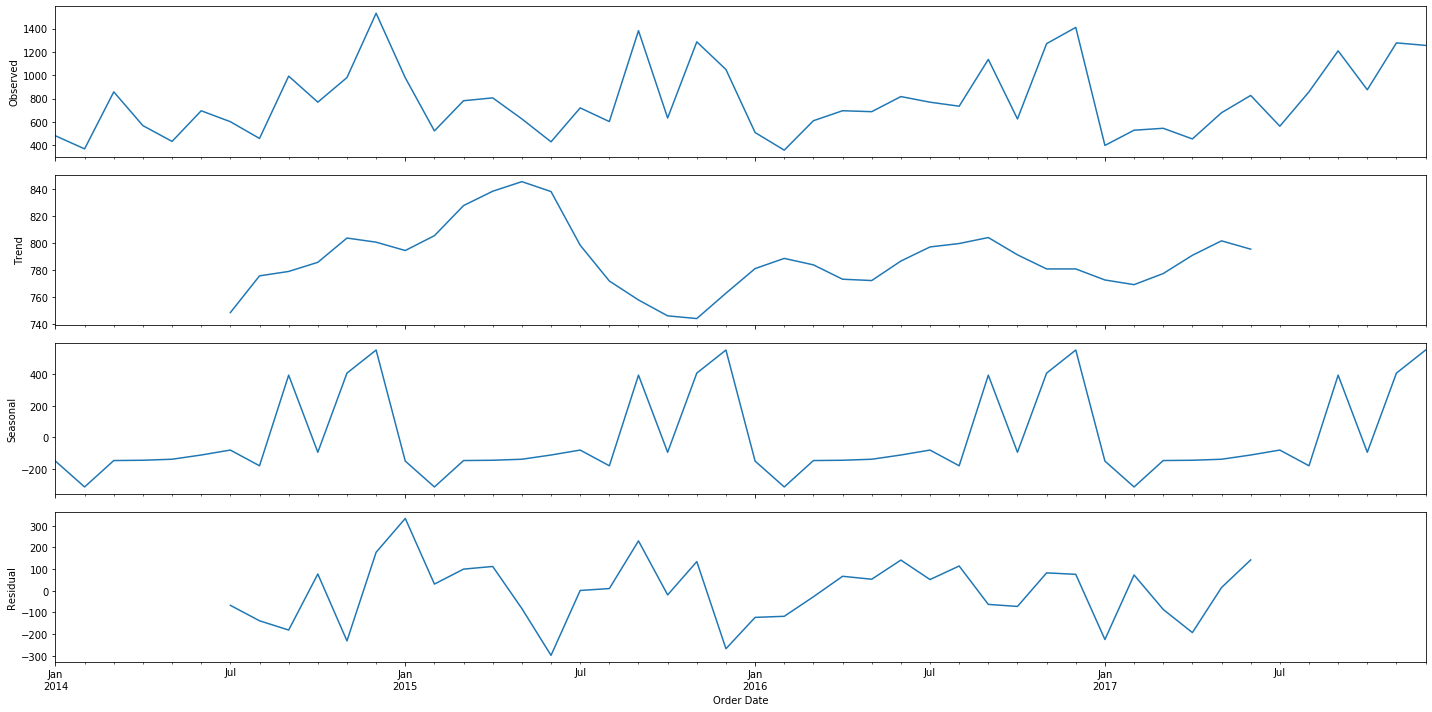

In [35]:
# 시계열 덧셈 분해 후 Trend /  Seasonal / Residual 로 구분
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### 시계열 전처리

- [결측치 처리](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)
- [이상치 탐지](#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb)


## 시계열 모델링

- Moving average(이동평균)

### 이동평균(Moving Average)

In [37]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [40]:
from sklearn.metrics import mean_absolute_error

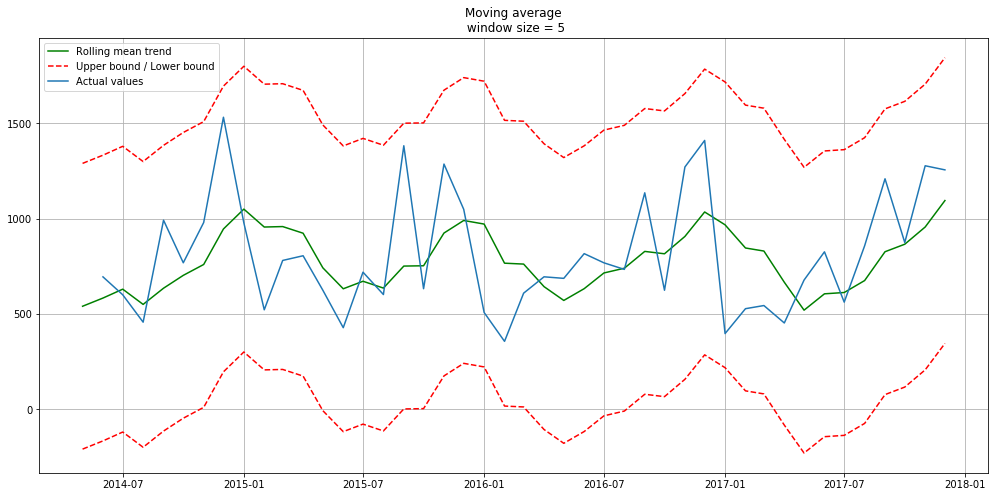

In [41]:
plot_moving_average(series= y, window =5,plot_intervals=True)

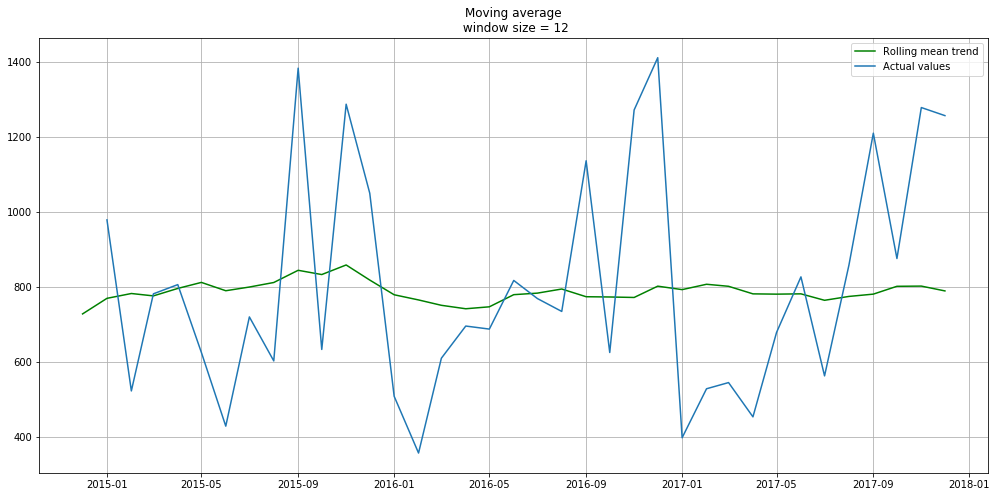

In [42]:
plot_moving_average(y, 12)

### Prophet 패키지를 이용한 예측

In [ ]:
! pip install fbprophet

In [44]:
from fbprophet import Prophet

In [61]:
prophet_input_df = y.to_frame()

In [63]:
prophet_input_df.reset_index(drop=False,inplace=True)

In [65]:
prophet_input_df.columns = ["ds","y"]

In [66]:
prophet_input_df.head(1)

,ds,y
0,2014-01-01,480.194231


In [67]:
m = Prophet()

In [68]:

m.fit(prophet_input_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
future = m.make_future_dataframe(periods=1,freq="MS")

In [70]:

future.tail()

,ds
44,2017-09-01
45,2017-10-01
46,2017-11-01
47,2017-12-01
48,2018-01-01


In [71]:


forecast = m.predict(future)

In [58]:

forecast.tail()[["ds","yhat"]]

,ds,yhat
44,2017-09-01,1160.011826
45,2017-10-01,743.970696
46,2017-11-01,1238.040310
47,2017-12-01,1379.338986
48,2018-01-01,603.063933
